# Deep Neural Network for Image Classification using Tensorflow

In [25]:
#import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

## Load and Process the Dataset

In [53]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check shape
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 52s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [67]:
print("Training target data shape:", y_train.shape)
print("Test target data shape:", y_test.shape)

Training target data shape: (50000, 1)
Test target data shape: (10000, 1)


## Build the Neural Network

In [55]:
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

## Compile the Model

In [57]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Train the Model

In [59]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.1949 - loss: 2.1751 - val_accuracy: 0.3122 - val_loss: 1.8950
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2932 - loss: 1.9220 - val_accuracy: 0.3447 - val_loss: 1.8631
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2995 - loss: 1.8881 - val_accuracy: 0.3546 - val_loss: 1.8257
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.3143 - loss: 1.8535 - val_accuracy: 0.3621 - val_loss: 1.7873
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3290 - loss: 1.8346 - val_accuracy: 0.3754 - val_loss: 1.7587
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3358 - loss: 1.8056 - val_accuracy: 0.3740 - val_loss: 1.7589
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3448 - loss: 1.7890 - val_accuracy: 0.3785 - val_loss: 1.7496
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.3488 - loss: 1.7823 - val_a

## Evaluate the model

In [63]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.3995 - loss: 1.6923

Test accuracy: 0.40


## Plot Training History

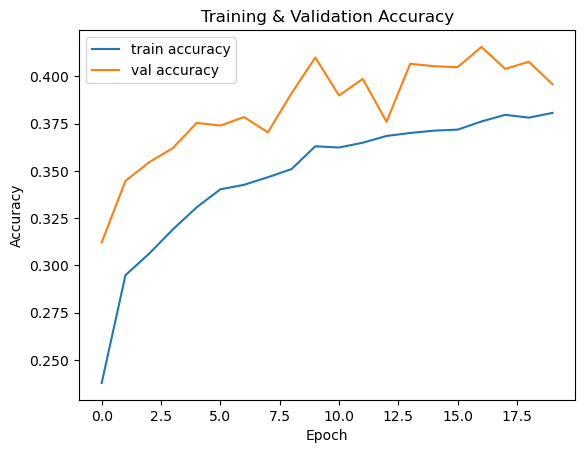

In [65]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()